# ART HopSkipJump Attack

In [5]:
%matplotlib inline

import numpy as np
import keras
from keras.preprocessing import image
from keras.layers import Dense, Flatten
from keras.models import Model
import keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [ ]:
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical

## Lenet

In [47]:
import numpy as np
import cv2
import os

import keras
from keras.datasets import mnist
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras import backend as K

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['CUDA_VISIBLE_DEVICES']='2' #使用GPU

In [48]:
class LeNet5:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)

        model.add(Conv2D(6, kernel_size=(5,5),
                            padding="same", activation="relu", 
                            input_shape=inputShape ))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Conv2D(16, kernel_size=(5,5), 
                            padding="valid", activation="relu"))
        model.add(MaxPool2D(pool_size=(2,2)))
        model.add(Flatten())
        model.add(Dense(120, activation="relu"))
        model.add(Dense(84, activation="relu"))
        model.add(Dense(10, activation="softmax"))

        return model

In [51]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

11493376/11490434 [==============================] - 21s 2us/step


In [52]:
model = LeNet5.build(28, 28, 1, 10)
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=5e-4), metrics=["accuracy"])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_6 (Dense)              (None, 84)              

In [53]:
model.fit(x_train,y_train,batch_size=120,epochs=7)
model.save('lenet.h5')


Epoch 1/7
60000/60000 [==============================] - 48s 800us/step - loss: 1.3625 - accuracy: 0.8334
Epoch 2/7
60000/60000 [==============================] - 46s 769us/step - loss: 0.1886 - accuracy: 0.9506
Epoch 3/7
60000/60000 [==============================] - 42s 701us/step - loss: 0.1191 - accuracy: 0.9649
Epoch 4/7
60000/60000 [==============================] - 48s 800us/step - loss: 0.0879 - accuracy: 0.9743
Epoch 5/7
60000/60000 [==============================] - 44s 742us/step - loss: 0.0661 - accuracy: 0.9795
Epoch 6/7
60000/60000 [==============================] - 40s 660us/step - loss: 0.0535 - accuracy: 0.9832
Epoch 7/7
60000/60000 [==============================] - 36s 598us/step - loss: 0.0446 - accuracy: 0.9852


# Model Definition

In [54]:
classifier = KerasClassifier(clip_values=(0, 255), model=model)

# Get Target and Init Images

In [99]:
init_image = x_test[2].reshape(1, 28, 28, 1)

Init image is:  1


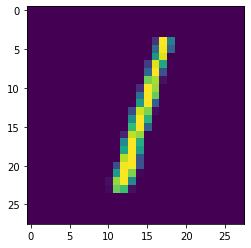

In [100]:
print( "Init image is: ", np.argmax(classifier.predict(init_image)) )
plt.imshow(init_image.reshape(28, 28).astype(np.uint))
plt.show()

In [101]:
target_image = x_test[0].reshape(1, 28, 28, 1)

Target image is:  7


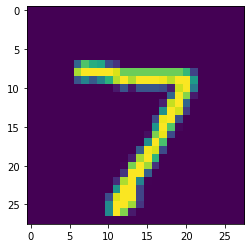

In [102]:
print( "Target image is: ", np.argmax(classifier.predict(target_image)) )
plt.imshow(target_image.reshape(28, 28).astype(np.uint))
plt.show()

# HopSkipJump Untargeted Attack

In [112]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(20):
    x_adv = attack.generate(x=init_image, x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
#     plt.imshow(x_adv[0].reshape(28, 28).astype(np.uint))
#     plt.show(block=False)
    
    attack.max_iter = iter_step

HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 0. L2 error 2166.591 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 10. L2 error 2102.4092 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 20. L2 error 2111.881 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 30. L2 error 2109.3982 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 40. L2 error 2118.3933 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 50. L2 error 2117.5654 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 60. L2 error 2126.0234 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 70. L2 error 2129.4238 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 80. L2 error 2128.6978 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 90. L2 error 2128.1523 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 100. L2 error 2128.3032 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 110. L2 error 2128.3657 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 120. L2 error 2130.4558 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 130. L2 error 2132.1606 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 140. L2 error 2133.6855 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 150. L2 error 2132.332 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 160. L2 error 2131.6301 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 170. L2 error 2129.4888 and class label 8.


HopSkipJump:   0%|                                       | 0/1 [00:00<?, ?it/s]

Adversarial image at step 180. L2 error 2129.545 and class label 8.


HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.71s/it]

Adversarial image at step 190. L2 error 2129.8638 and class label 8.


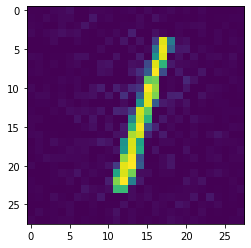

In [113]:
plt.imshow(x_adv[0].reshape(28, 28).astype(np.uint))

In [114]:
np.argmax(classifier.predict(x_adv)[0])

8

# HopSkipJump Targeted Attack

HopSkipJump: 100%|█████████████████████████████| 1/1 [00:00<00:00, 1000.07it/s]


Adversarial image at step 0. L2 error 2176.5608 and class label 1.


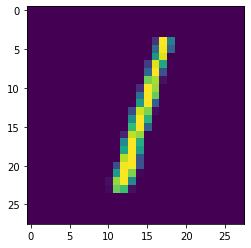

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]


Adversarial image at step 10. L2 error 1495.9786 and class label 1.


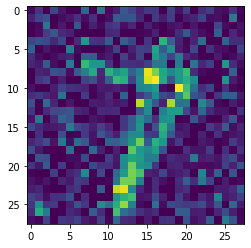

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]

Adversarial image at step 20. L2 error 1061.002 and class label 1.


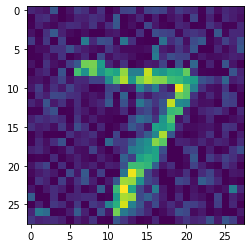

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


Adversarial image at step 30. L2 error 881.28986 and class label 1.


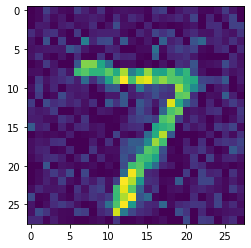

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


Adversarial image at step 40. L2 error 725.1092 and class label 1.


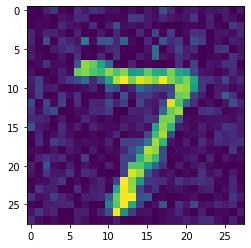

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


Adversarial image at step 50. L2 error 615.9897 and class label 1.


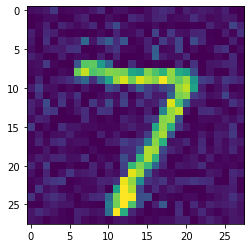

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.23s/it]


Adversarial image at step 60. L2 error 574.04944 and class label 1.


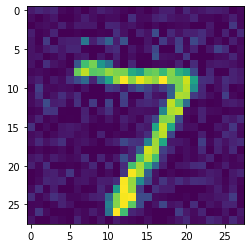

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.35s/it]


Adversarial image at step 70. L2 error 534.45483 and class label 1.


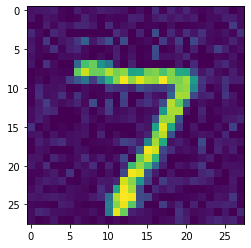

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


Adversarial image at step 80. L2 error 506.5452 and class label 1.


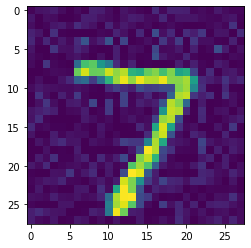

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.54s/it]


Adversarial image at step 90. L2 error 483.20172 and class label 1.


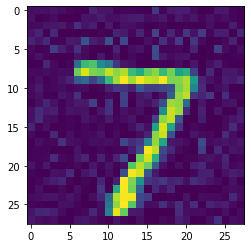

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]


Adversarial image at step 100. L2 error 455.02133 and class label 1.


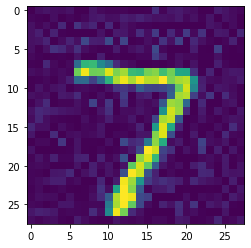

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]


Adversarial image at step 110. L2 error 429.9495 and class label 1.


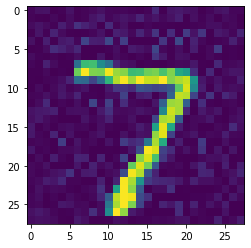

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]


Adversarial image at step 120. L2 error 419.73932 and class label 1.


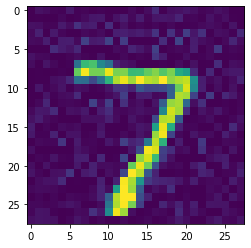

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]


Adversarial image at step 130. L2 error 404.42755 and class label 1.


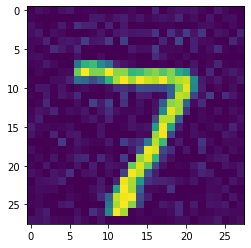

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.23s/it]


Adversarial image at step 140. L2 error 395.36652 and class label 1.


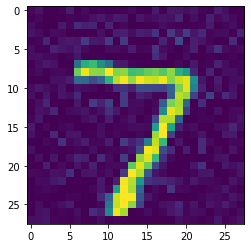

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


Adversarial image at step 150. L2 error 393.86673 and class label 1.


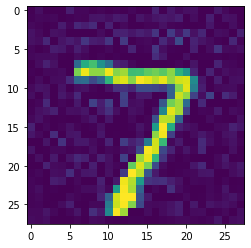

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.30s/it]


Adversarial image at step 160. L2 error 388.87448 and class label 1.


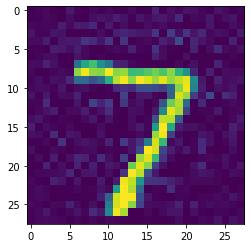

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.38s/it]

Adversarial image at step 170. L2 error 380.85062 and class label 1.


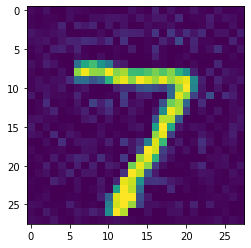

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]


Adversarial image at step 180. L2 error 376.3017 and class label 1.


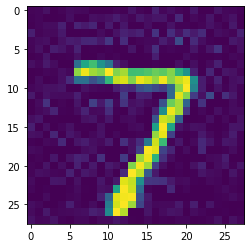

HopSkipJump: 100%|███████████████████████████████| 1/1 [00:02<00:00,  2.23s/it]


Adversarial image at step 190. L2 error 372.12244 and class label 1.


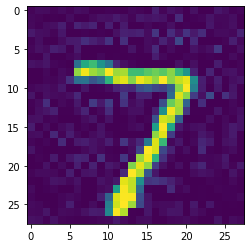

In [118]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = init_image
for i in range(20):
    x_adv = attack.generate(x=target_image, y=to_categorical([1], 1000), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].reshape(28, 28).astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

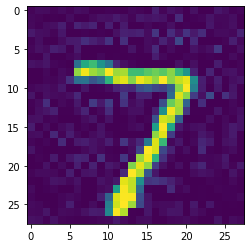

In [119]:
plt.imshow(x_adv[0].reshape(28, 28).astype(np.uint))

In [120]:
np.argmax(classifier.predict(x_adv)[0])

1

# Unsquared Images

HopSkipJump attack supports inputs of unsquared images. The code in the following cell describes an example of creating a Resnet50-based classifier to attack unsquared images.

In [8]:
# Adjust image shape here
image_shape = (224, 150)

mean_imagenet = np.zeros(tuple(list(image_shape) + [3]))
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)

model = ResNet50(weights='imagenet', input_shape=tuple(list(image_shape) + [3]), include_top=False)

def _kr_initialize(_, dtype=None):
    return k.variable(value=np.random.randn(np.prod(list(model.output.shape)[1:]).value, 1000))

head = model.output
head = Flatten()(head)
head = Dense(1000, kernel_initializer=_kr_initialize, bias_initializer=keras.initializers.Zeros())(head)
new_model = Model(inputs=model.input, outputs=head)

classifier = KerasClassifier(clip_values=(0, 255), model=new_model, preprocessing=(mean_imagenet, 1))
# Then call classifier.fit() to train the new weights

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
